In [4]:
!pip install polars
!pip install -U matplotlib

  Using cached matplotlib-3.10.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (8.6 MB)
  Using cached contourpy-1.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (326 kB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached fonttools-4.58.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.9 MB)
  Using cached kiwisolver-1.4.8-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.4 MB)
  Using cached numpy-2.2.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.8 MB)
  Using cached pillow-11.2.1-cp311-cp311-manylinux_2_28_x86_64.whl (4.6 MB)
  Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)


In [5]:
import polars as pl

df_csv = pl.read_csv("archive/resultados.csv")
print(df_csv)

shape: (7, 4)
┌──────┬────────────────────────────┬───────────┬───────────┐
│ n    ┆ Algoritmo Tradicional (ms) ┆ DR1 (ms)  ┆ DR2 (ms)  │
│ ---  ┆ ---                        ┆ ---       ┆ ---       │
│ i64  ┆ f64                        ┆ f64       ┆ f64       │
╞══════╪════════════════════════════╪═══════════╪═══════════╡
│ 32   ┆ 1.32                       ┆ 1.92      ┆ 1.96      │
│ 64   ┆ 10.37                      ┆ 16.61     ┆ 15.85     │
│ 128  ┆ 81.8                       ┆ 135.92    ┆ 117.99    │
│ 256  ┆ 581.96                     ┆ 548.38    ┆ 423.46    │
│ 512  ┆ 2713.04                    ┆ 4407.8    ┆ 3007.3    │
│ 1024 ┆ 23561.08                   ┆ 35977.85  ┆ 21234.77  │
│ 2048 ┆ 263011.17                  ┆ 285904.79 ┆ 150243.44 │
└──────┴────────────────────────────┴───────────┴───────────┘


## Preparar datos para graficarlos

In [11]:
n = df_csv['n'].to_list()
print("Tamaño de las matrices generadas:", n)

Tamaño de las matrices generadas: [32, 64, 128, 256, 512, 1024, 2048]


In [12]:
traditional = df_csv['Algoritmo Tradicional (ms)'].to_list()
print("Algoritmo Tradicional:", traditional)

dr1 = df_csv['DR1 (ms)'].to_list()
print("Divide y Conquista:", dr1)

dr2 = df_csv['DR2 (ms)'].to_list()
print("Straussen's:", dr2)

Algoritmo Tradicional: [1.32, 10.37, 81.8, 581.96, 2713.04, 23561.08, 263011.17]
Divide y Conquista: [1.92, 16.61, 135.92, 548.38, 4407.8, 35977.85, 285904.79]
Straussen's: [1.96, 15.85, 117.99, 423.46, 3007.3, 21234.77, 150243.44]


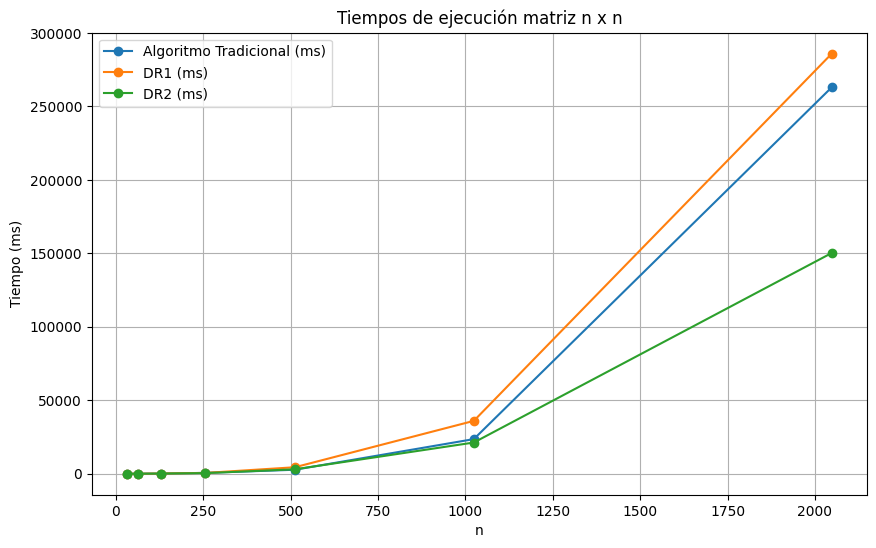

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(n, traditional, marker='o', label='Algoritmo Tradicional (ms)')
plt.plot(n, dr1, marker='o', label='DR1 (ms)')
plt.plot(n, dr2, marker='o', label='DR2 (ms)')

plt.xlabel('n')
plt.ylabel('Tiempo (ms)')
plt.title('Tiempos de ejecución matriz n x n')
plt.legend()
plt.grid(True)
plt.show()